## 파이썬 머신러닝
# 선형회귀의 개선 모델들 : 릿지와 라쏘

- 선형회귀에서는 MSE(Mean Sqaured Error) 를 최소화 하는 기울기(w)와 절편(b) 를 찾는다고 했다.
- **릿지(Ridge)** 와 **라쏘(Lasso)** 는 오차값에 규제(Regulation) 항 또는 벌점(Penalty) 항을 추가해서, 좀 더 단순화된 모델 또는 일반화된 모델을 제공하는 방법이다.
- 이렇게 단순하거나 일반화된 모델에서는 훈련세트에 덜 과대적합되어, 테스트세트에 좀 더 적합한 모델을 만들 수 있습니다.
> $$ MSE = {1 \over N} \sum_{i=0}^{N-1} (y_i - \hat{y}_i)^2
= {1 \over N} \sum_{i=0}^{N-1} (y_i - (w x_i + b))^2 $$ <br>
> <br>
> In Ridge, $ Error = MSE + \alpha w^2 $ <br>
> <br>
> In Rasso, $ Error = MSE + \alpha \left\vert w \right\vert $

- 위의 공식에서 릿지는 w의 제곱항(L2 규제)를, 라쏘는 w의 절대값(L1 규제)를 추가하였습니다. 여기서 alpha 값은 규제의 강도를 의미합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

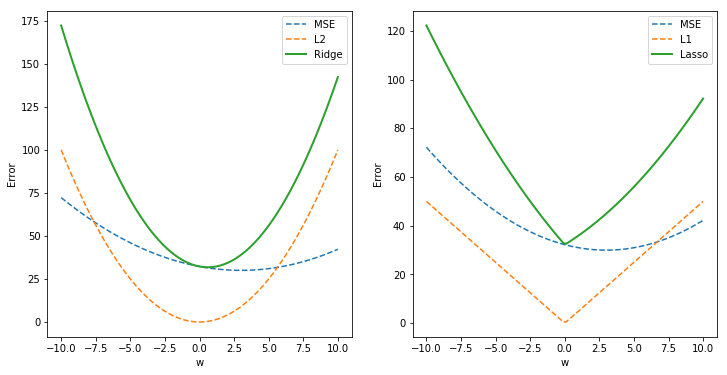

In [3]:
fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = (0.5*(rng-3))**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,'--',label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,'--',label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

- 위의 그림을 자세히 볼 필요가 있습니다.
- 릿지와 라쏘 모두 Error 의 최소값 위치가 **w 값이 0쪽으로 치우쳐 진다** 는 것을 확인할 수 있습니다.
- 그리고 라쏘의 경우 릿지 보다 **최소값 근처에서 기울기가 크다**는 것을 볼 수 있습니다.
- 릿지와 라쏘 모두 앞에서 배운 경사하강법을 사용합니다. 그러므로 라쏘가 최소값 근방에서 급속히 w=0 으로 향하게 됩니다. 이것이 릿지와 라쏘의 가장 큰 차이입니다.
- 이런 특성 때문에, 릿지는 모든 w 값이 천천히 0으로 향하는 데 반해, 라쏘는 특정 w 값이 빨리 0으로 향하게 됩니다.
- 또한 규제의 강도를 의미하는 **alpha** 값이 커질수록 w 가 0으로 향하는 정도와 속도가 커집니다.
> SVC 에서 배운 C 값은 alpha 값의 역수이다.
> 그러므로 C 값이 커지면 alpha 값이 작아지는 의미가 되어, 훈련데이터에 과적합 되는 경향이 된다.

- 아래에서 선형회귀, 릿지, 라쏘 에서 w 값이 어떻게 변하는지 확인해 보겠습니다.

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.coef_, lr.intercept_

(array([-0.11808076, -0.03672941,  0.2357236 ,  0.58215629]),
 0.20193856124405019)

In [13]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

ridge.coef_, ridge.intercept_

(array([ 0.07153451, -0.0386895 ,  0.26473931,  0.13289504]),
 -0.47935091275126174)

In [19]:
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso.coef_, lasso.intercept_

(array([ 0.        , -0.        ,  0.10239154,  0.        ]),
 0.575959917400191)

- 아래에서는 각 모델의 점수를 확인해 보겠습니다.

In [20]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
display('LinearRegression', train_score, test_score)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
display('Ridge', train_score, test_score)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
display('Lasso', train_score, test_score)

'LinearRegression'

0.9246517999228845

0.9402908389979887

'Ridge'

0.8704205669095777

0.8578349220066444

'Lasso'

0.37429552437896507

0.3313672566731164

- 라쏘의 점수가 상당히 낮습니다. 릿지와 라쏘의 규제값은 alpha 값입니다.
- alpha 값을 바꿔 가면서 점수를 확인해 보겠습니다.
> 자주 쓰이는 C 값은 alpha 값의 역수이다.

In [35]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]
train_scores = []
test_scores = []
ws = []
bs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    ws.append(lasso.coef_)
    bs.append(lasso.intercept_)
    
    s1 = lasso.score(X_train, y_train)
    s2 = lasso.score(X_test, y_test)
    train_scores.append(s1)
    test_scores.append(s2)
    
display(train_scores, test_scores, ws, bs)

[0.0,
 0.4590547528916444,
 0.9031445327026855,
 0.9356626582870008,
 0.9382830511918393,
 0.9383094225840816]

[-0.14869937612350603,
 0.36694861683879676,
 0.8588998289468527,
 0.8869875179068135,
 0.8908566008274419,
 0.8909336633291486]

[array([ 0., -0.,  0.,  0.]),
 array([ 0.        , -0.        ,  0.13100657,  0.        ]),
 array([ 0.        , -0.        ,  0.41010752,  0.        ]),
 array([-0.00570248, -0.06262887,  0.21523607,  0.52439455]),
 array([-0.06314921, -0.07917975,  0.19243497,  0.63788843]),
 array([-0.06829128, -0.08134795,  0.18955319,  0.64992925])]

[0.9285714285714286,
 0.4599890036756599,
 -0.5382952928414126,
 -0.20687178874865442,
 0.12950599681703479,
 0.16262177137809264]

In [36]:
y_train.mean()

0.9285714285714286

Text(0.5,0,'alpha')

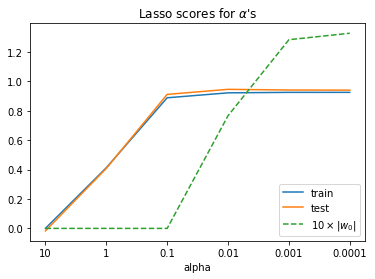

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(len(alphas)), train_scores)
plt.plot(range(len(alphas)), test_scores)
plt.plot(range(len(alphas)), 10*np.abs(np.array(ws)[:,0]), '--')
plt.xticks(range(len(alphas)),alphas)
plt.legend(['train', 'test', r'$ 10 \times \vert w_0 \vert $'],loc='lower right')
plt.title('Lasso scores for $\\alpha$\'s')
plt.xlabel('alpha')

### 속성 2개 간의 회귀 적용

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

In [12]:
X = iris.data[:, [0]]
y = iris.data[:, 2]

(4.110143369175627, 8.089856630824372, 0.6898233995584988, 7.2101766004415015)

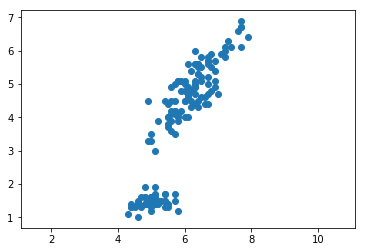

In [13]:
plt.scatter(X, y)
plt.axis('equal')

In [14]:
model = LinearRegression()
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_
print(model.score(X, y), model.coef_)

0.7599553107783261 [1.85750967]


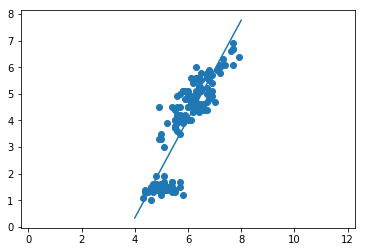

In [15]:
plt.scatter(X, y)
plt.axis('equal')

x = np.array([4,8])
plt.plot(x, w*x+b)

In [29]:
model = Ridge(alpha=100)
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_
print(model.score(X, y), model.coef_)

0.5740200348062152 [0.93871609]


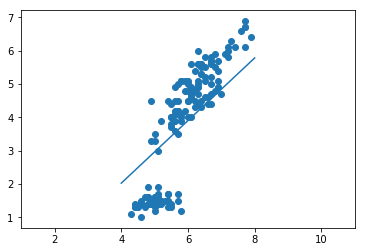

In [30]:
plt.scatter(X, y)
plt.axis('equal')

x = np.array([4,8])
plt.plot(x, w*x+b)

In [23]:
model = Lasso(alpha=1)
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_
print(model.score(X, y), model.coef_)

0.28519348614676343 [0.38934438]


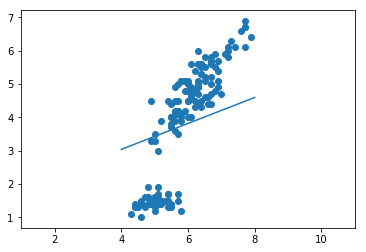

In [24]:
plt.scatter(X, y)
plt.axis('equal')

x = np.array([4,8])
plt.plot(x, w*x+b)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(iris.data[:,0].reshape(-1,1), iris.data[:,2])

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
display(train_score, test_score)

[1.91881362] -7.409815546855185


0.7644157547937634

0.7377179522730737

In [27]:
ridge = Ridge()
ridge.fit(X_train, y_train)

print(ridge.coef_, ridge.intercept_)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
display(train_score, test_score)

[1.89207586] -7.255142399649644


0.764267327429001

0.7404683810551664

In [31]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print(lasso.coef_, lasso.intercept_)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
display(train_score, test_score)

[1.76054149] -6.49423954557326


0.7592149214996384

0.7485051896260615